In [197]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np
import pandas as pd
import requests
import json


In [198]:
# 2df7d990-4bbc-c1bd-f33e-2da2413413df
token=input("token: ")

In [199]:

nombre_estado=["Aguascalientes","Baja California","Baja California Sur","Campeche","Coahuila","Colima","Chiapas","Chihuahua","Ciudad de México","Durango","Guanajuato","Guerrero","Hidalgo","Jalisco","Estado de México","Michoacán","Morelos","Nayarit","Nuevo León","Oaxaca","Puebla","Querétaro","Quintana Roo","San Luis Potosí","Sinaloa","Sonora","Tabasco","Tamaulipas","Tlaxcala","Veracruz","Yucatán","Zacatecas"]
estado_api={i:name for i,name in zip(range(7000001,7000033),nombre_estado)}
estado_api

{7000001: 'Aguascalientes',
 7000002: 'Baja California',
 7000003: 'Baja California Sur',
 7000004: 'Campeche',
 7000005: 'Coahuila',
 7000006: 'Colima',
 7000007: 'Chiapas',
 7000008: 'Chihuahua',
 7000009: 'Ciudad de México',
 7000010: 'Durango',
 7000011: 'Guanajuato',
 7000012: 'Guerrero',
 7000013: 'Hidalgo',
 7000014: 'Jalisco',
 7000015: 'Estado de México',
 7000016: 'Michoacán',
 7000017: 'Morelos',
 7000018: 'Nayarit',
 7000019: 'Nuevo León',
 7000020: 'Oaxaca',
 7000021: 'Puebla',
 7000022: 'Querétaro',
 7000023: 'Quintana Roo',
 7000024: 'San Luis Potosí',
 7000025: 'Sinaloa',
 7000026: 'Sonora',
 7000027: 'Tabasco',
 7000028: 'Tamaulipas',
 7000029: 'Tlaxcala',
 7000030: 'Veracruz',
 7000031: 'Yucatán',
 7000032: 'Zacatecas'}

## Población nacida en otro país residente en México

In [200]:
poblacion_nacida_en_otro_pais={}
for i, estado in estado_api.items():
  url=f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6200205259/es/0{i}/false/BISE/2.0/{token}?type=json'
  respuesta = requests.get(url)
  if respuesta.status_code == 200:
    contenido = json.loads(respuesta.content)

    # Iterar sobre las observaciones
    for el in contenido['Series'][0]['OBSERVATIONS']:
      # Si el estado no existe en el diccionario, lo inicializamos
      if estado not in poblacion_nacida_en_otro_pais:
        poblacion_nacida_en_otro_pais[estado] = {}
          
      # Agregamos el periodo de tiempo y el valor de la observación al estado correspondiente
      poblacion_nacida_en_otro_pais[estado][el['TIME_PERIOD']] = el['OBS_VALUE']

    

In [201]:
df_nacido_otro_pais = pd.DataFrame(poblacion_nacida_en_otro_pais)
df_nacido_otro_pais = df_nacido_otro_pais.apply(pd.to_numeric, errors='coerce')
df_nacido_otro_pais

,Aguascalientes,Baja California,Baja California Sur,Campeche,Coahuila,Colima,Chiapas,Chihuahua,Ciudad de México,Durango,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatán,Zacatecas
1990,2010.0,32882.0,1819.0,8125.0,8192.0,1610.0,31101.0,24594.0,55412.0,4930.0,...,7767.0,4219.0,3379.0,9980.0,733.0,26912.0,290.0,4019.0,2011.0,6814.0
2000,6809.0,59716.0,3113.0,4678.0,11010.0,3900.0,17416.0,44436.0,56187.0,7703.0,...,8091.0,6871.0,6571.0,16353.0,1179.0,36177.0,749.0,6082.0,3489.0,9397.0
2010,10363.0,122664.0,6438.0,6450.0,22662.0,9346.0,32868.0,79532.0,71691.0,14871.0,...,18517.0,15288.0,17973.0,44685.0,4481.0,61393.0,3241.0,22646.0,6951.0,18139.0
2020,13735.0,152377.0,9364.0,8005.0,28295.0,8331.0,60438.0,101229.0,104629.0,15335.0,...,39586.0,17807.0,21776.0,52357.0,7593.0,68339.0,4150.0,24375.0,15405.0,18031.0


In [202]:
poblacion_nacida_en_otro_pais_hombres={}
for i, estado in estado_api.items():
  url=f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6200205268/es/0{i}/false/BISE/2.0/{token}?type=json'
  respuesta = requests.get(url)
  if respuesta.status_code == 200:
    contenido = json.loads(respuesta.content)
    # Iterar sobre las observaciones
    for el in contenido['Series'][0]['OBSERVATIONS']:
      # Si el estado no existe en el diccionario, lo inicializamos
      if estado not in poblacion_nacida_en_otro_pais_hombres:
        poblacion_nacida_en_otro_pais_hombres[estado] = {}
          
      # Agregamos el periodo de tiempo y el valor de la observación al estado correspondiente
      poblacion_nacida_en_otro_pais_hombres[estado][el['TIME_PERIOD']] = el['OBS_VALUE']

In [203]:
df_nacido_otro_pais_hombres = pd.DataFrame(poblacion_nacida_en_otro_pais_hombres)
df_nacido_otro_pais_hombres = df_nacido_otro_pais_hombres.apply(pd.to_numeric, errors='coerce')
df_nacido_otro_pais_hombres

,Aguascalientes,Baja California,Baja California Sur,Campeche,Coahuila,Colima,Chiapas,Chihuahua,Ciudad de México,Durango,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatán,Zacatecas
1990,913.0,17313.0,999.0,4171.0,4063.0,807.0,16807.0,12401.0,26721.0,2462.0,...,3865.0,2029.0,1697.0,5085.0,409.0,13590.0,166.0,2259.0,960.0,3369.0
2000,3369.0,31623.0,1689.0,2404.0,5701.0,2004.0,8210.0,22739.0,27025.0,3868.0,...,3922.0,3506.0,3350.0,8334.0,649.0,18926.0,418.0,3276.0,1687.0,4670.0
2010,5256.0,65076.0,3482.0,3202.0,11736.0,4816.0,15376.0,40513.0,34413.0,7568.0,...,9004.0,7894.0,9182.0,22873.0,2266.0,32093.0,1617.0,11695.0,3473.0,8998.0
2020,7088.0,82394.0,5088.0,3891.0,14852.0,4238.0,29878.0,52203.0,51793.0,7804.0,...,19107.0,9257.0,11193.0,27159.0,3931.0,35775.0,2073.0,12508.0,7761.0,8861.0


In [204]:
poblacion_nacida_en_otro_pais_mujeres={}
for i, estado in estado_api.items():
  url=f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6200205284/es/0{i}/false/BISE/2.0/{token}?type=json'
  respuesta = requests.get(url)
  if respuesta.status_code == 200:
    contenido = json.loads(respuesta.content)
    # Iterar sobre las observaciones
    for el in contenido['Series'][0]['OBSERVATIONS']:
      # Si el estado no existe en el diccionario, lo inicializamos
      if estado not in poblacion_nacida_en_otro_pais_mujeres:
        poblacion_nacida_en_otro_pais_mujeres[estado] = {}
          
      # Agregamos el periodo de tiempo y el valor de la observación al estado correspondiente
      poblacion_nacida_en_otro_pais_mujeres[estado][el['TIME_PERIOD']] = el['OBS_VALUE']

In [205]:
df_nacido_otro_pais_mujeres = pd.DataFrame(poblacion_nacida_en_otro_pais_mujeres)
df_nacido_otro_pais_mujeres = df_nacido_otro_pais_mujeres.apply(pd.to_numeric, errors='coerce')

df_nacido_otro_pais_mujeres

,Aguascalientes,Baja California,Baja California Sur,Campeche,Coahuila,Colima,Chiapas,Chihuahua,Ciudad de México,Durango,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatán,Zacatecas
1990,1097.0,15569.0,820.0,3954.0,4129.0,803.0,14294.0,12193.0,28691.0,2468.0,...,3902.0,2190.0,1682.0,4895.0,324.0,13322.0,124.0,1760.0,1051.0,3445.0
2000,3440.0,28093.0,1424.0,2274.0,5309.0,1896.0,9206.0,21697.0,29162.0,3835.0,...,4169.0,3365.0,3221.0,8019.0,530.0,17251.0,331.0,2806.0,1802.0,4727.0
2010,5107.0,57588.0,2956.0,3248.0,10926.0,4530.0,17492.0,39019.0,37278.0,7303.0,...,9513.0,7394.0,8791.0,21812.0,2215.0,29300.0,1624.0,10951.0,3478.0,9141.0
2020,6647.0,69983.0,4276.0,4114.0,13443.0,4093.0,30560.0,49026.0,52836.0,7531.0,...,20479.0,8550.0,10583.0,25198.0,3662.0,32564.0,2077.0,11867.0,7644.0,9170.0


## Grafíca con Seaborn

In [206]:
top_10_estados = df_nacido_otro_pais.loc['2020'].sort_values(ascending=False).head(10).index.to_list()
top_10_estados


['Baja California',
 'Ciudad de México',
 'Chihuahua',
 'Jalisco',
 'Tamaulipas',
 'Estado de México',
 'Chiapas',
 'Sonora',
 'Nuevo León',
 'Michoacán']

In [207]:
df_nacido_otro_pais.T['1990'][top_10_estados]

Baja California     32882.0
Ciudad de México    55412.0
Chihuahua           24594.0
Jalisco             29712.0
Tamaulipas          26912.0
Estado de México    17977.0
Chiapas             31101.0
Sonora               9980.0
Nuevo León          14446.0
Michoacán           12258.0
Name: 1990, dtype: float64

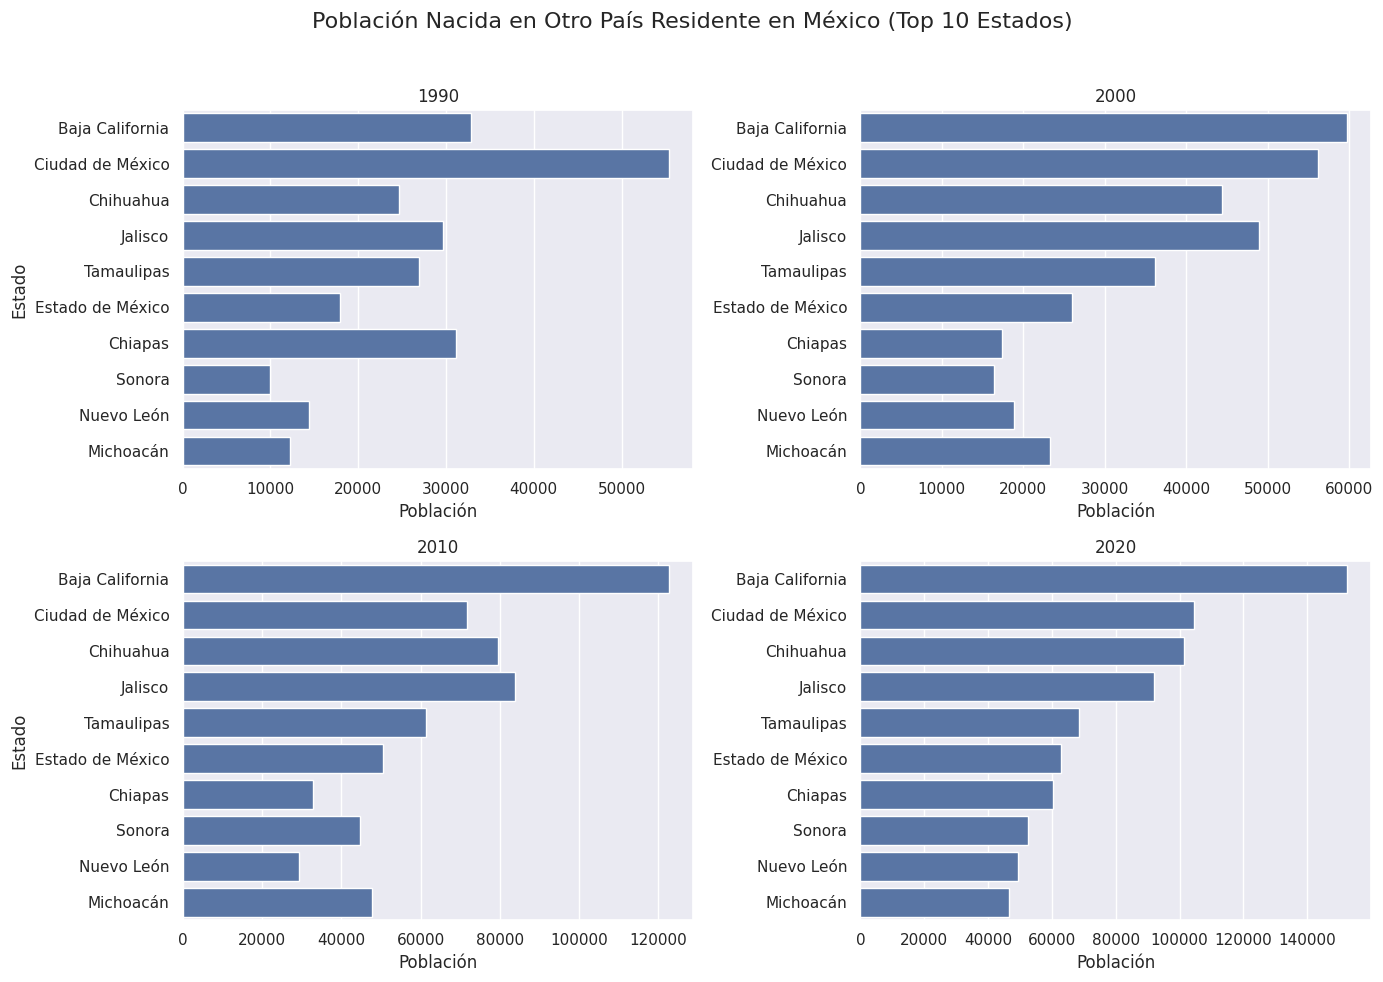

In [208]:
sns.set()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

fig.suptitle('Población Nacida en Otro País Residente en México (Top 10 Estados)', fontsize=16)

sns.barplot(y=df_nacido_otro_pais.T['1990'][top_10_estados].index, x=df_nacido_otro_pais.T['1990'][top_10_estados], ax=axes[0, 0])
axes[0, 0].set_title('1990')
axes[0, 0].set_xlabel('Población')
axes[0, 0].set_ylabel('Estado')

sns.barplot(y=df_nacido_otro_pais.T['2000'][top_10_estados].index, x=df_nacido_otro_pais.T['2000'][top_10_estados], ax=axes[0, 1])
axes[0, 1].set_title('2000')
axes[0, 1].set_xlabel('Población')
axes[0, 1].set_ylabel('')

sns.barplot(y=df_nacido_otro_pais.T['2010'][top_10_estados].index, x=df_nacido_otro_pais.T['2010'][top_10_estados], ax=axes[1, 0])
axes[1, 0].set_title('2010')
axes[1, 0].set_xlabel('Población')
axes[1, 0].set_ylabel('Estado')

sns.barplot(y=df_nacido_otro_pais.T['2020'][top_10_estados].index, x=df_nacido_otro_pais.T['2020'][top_10_estados], ax=axes[1, 1])
axes[1, 1].set_title('2020')
axes[1, 1].set_xlabel('Población')
axes[1, 1].set_ylabel('')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

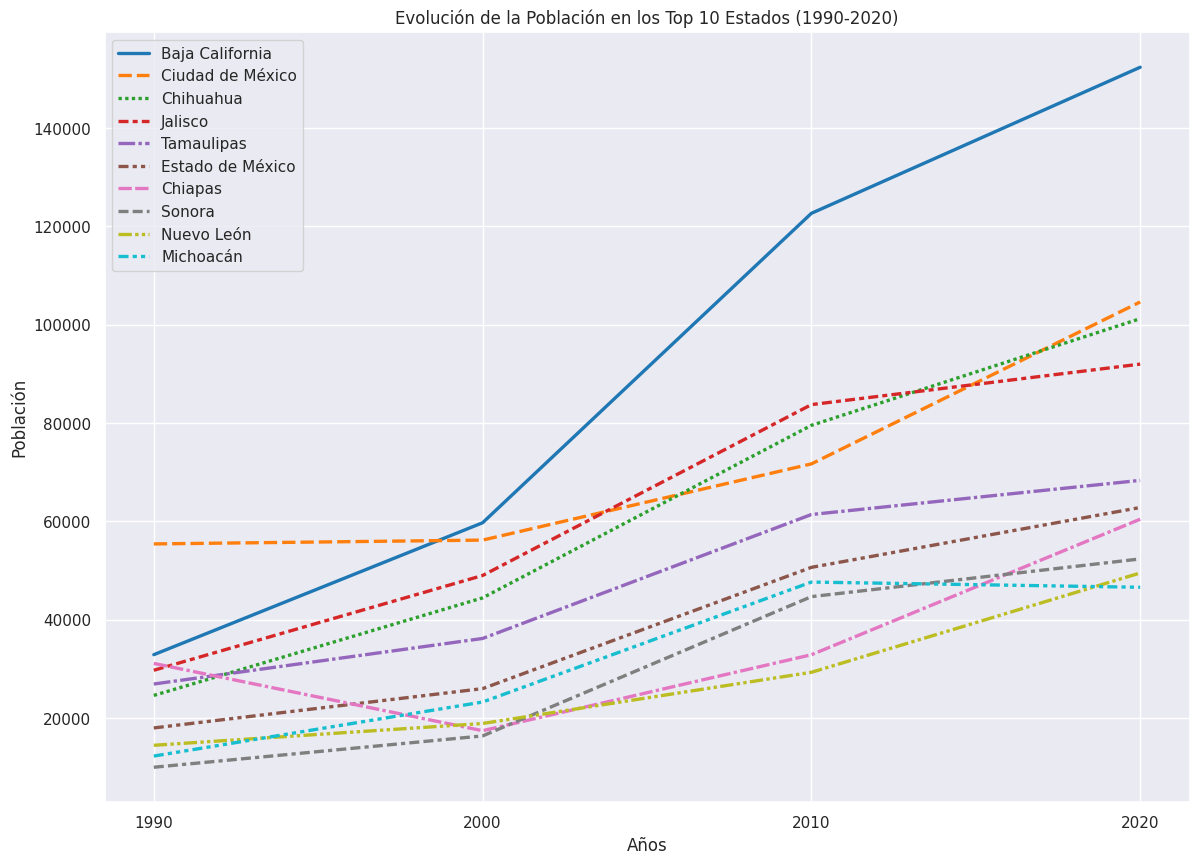

In [209]:
plt.figure(figsize=(14, 10))

sns.lineplot(data=df_nacido_otro_pais[top_10_estados], palette='tab10', linewidth=2.4)

plt.title('Evolución de la Población en los Top 10 Estados (1990-2020)', fontsize=12)
plt.xlabel('Años')
plt.ylabel('Población')
plt.show()

## Grafica con Matplotlib

<Figure size 1400x800 with 0 Axes>

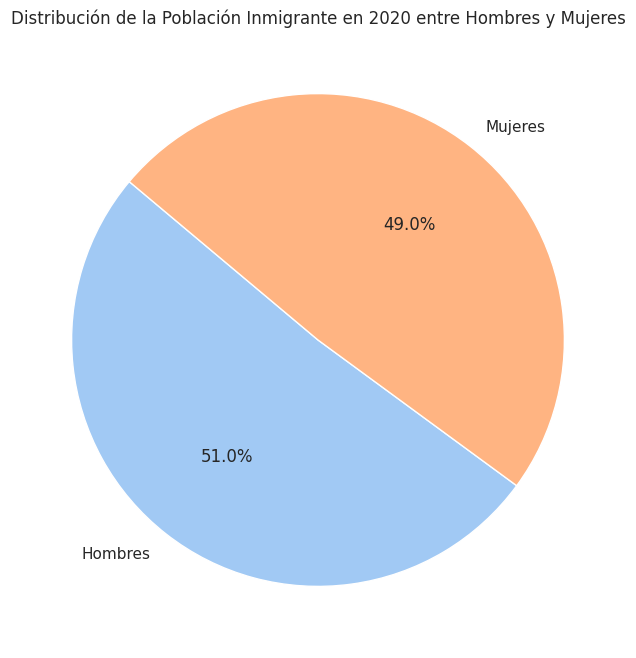

In [210]:
# Sumar la población inmigrante de hombres y mujeres en 2020
total_hombres_2020 = df_nacido_otro_pais_hombres.loc['2020'].sum()
total_mujeres_2020 = df_nacido_otro_pais_mujeres.loc['2020'].sum()
plt.figure(figsize=(14, 8))
# Crear un DataFrame con los totales
df_pie = pd.DataFrame({
  'Género': ['Hombres', 'Mujeres'],
  'Población': [total_hombres_2020, total_mujeres_2020]
})

# Crear la gráfica de pastel
plt.figure(figsize=(8, 8))
plt.pie(df_pie['Población'], labels=df_pie['Género'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribución de la Población Inmigrante en 2020 entre Hombres y Mujeres')
plt.show()

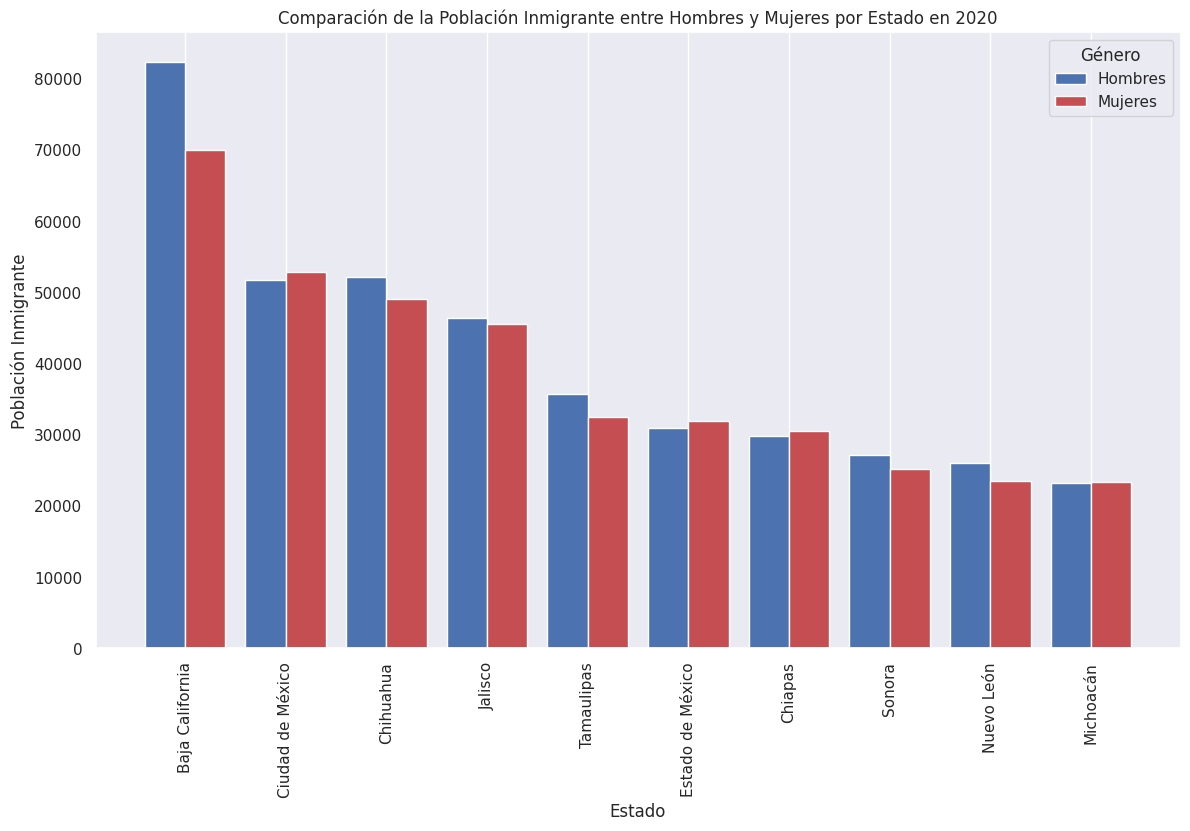

In [211]:
# Crear un DataFrame con la población de hombres y mujeres por estado en 2020
df_comparacion_2020 = pd.DataFrame({
  'Hombres': df_nacido_otro_pais_hombres.loc['2020', top_10_estados],
  'Mujeres': df_nacido_otro_pais_mujeres.loc['2020', top_10_estados],
})

# Crear la gráfica de barras con Matplotlib
plt.figure(figsize=(14, 8))

bar_width = 0.4
index = np.arange(len(df_comparacion_2020))

plt.bar(index, df_comparacion_2020['Hombres'], bar_width, label='Hombres', color='b')
plt.bar(index + bar_width, df_comparacion_2020['Mujeres'], bar_width, label='Mujeres', color='r')

plt.title('Comparación de la Población Inmigrante entre Hombres y Mujeres por Estado en 2020')
plt.xlabel('Estado')
plt.ylabel('Población Inmigrante')
plt.xticks(index + bar_width / 2, df_comparacion_2020.index, rotation=90)
plt.legend(title='Género')
plt.grid(axis='y')

plt.show()

## Mapa


In [212]:
df_nacido_otro_pais.T

,1990,2000,2010,2020
Aguascalientes,2010.0,6809.0,10363.0,13735.0
Baja California,32882.0,59716.0,122664.0,152377.0
Baja California Sur,1819.0,3113.0,6438.0,9364.0
Campeche,8125.0,4678.0,6450.0,8005.0
Coahuila,8192.0,11010.0,22662.0,28295.0
Colima,1610.0,3900.0,9346.0,8331.0
Chiapas,31101.0,17416.0,32868.0,60438.0
Chihuahua,24594.0,44436.0,79532.0,101229.0
Ciudad de México,55412.0,56187.0,71691.0,104629.0
Durango,4930.0,7703.0,14871.0,15335.0


In [213]:
estados_geo = '../CD_14_Visualizacion_Folium/datos/geo/mexico_estados_geo.json'

json_estados = json.load(open(estados_geo)) 

In [214]:
lista_estado ={estado['properties']['name']:estado['id'] for estado in json_estados['features'] if estado['properties']['name'] != ''}

len(lista_estado)

32

In [215]:
df_nacido_otro_pais

,Aguascalientes,Baja California,Baja California Sur,Campeche,Coahuila,Colima,Chiapas,Chihuahua,Ciudad de México,Durango,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatán,Zacatecas
1990,2010.0,32882.0,1819.0,8125.0,8192.0,1610.0,31101.0,24594.0,55412.0,4930.0,...,7767.0,4219.0,3379.0,9980.0,733.0,26912.0,290.0,4019.0,2011.0,6814.0
2000,6809.0,59716.0,3113.0,4678.0,11010.0,3900.0,17416.0,44436.0,56187.0,7703.0,...,8091.0,6871.0,6571.0,16353.0,1179.0,36177.0,749.0,6082.0,3489.0,9397.0
2010,10363.0,122664.0,6438.0,6450.0,22662.0,9346.0,32868.0,79532.0,71691.0,14871.0,...,18517.0,15288.0,17973.0,44685.0,4481.0,61393.0,3241.0,22646.0,6951.0,18139.0
2020,13735.0,152377.0,9364.0,8005.0,28295.0,8331.0,60438.0,101229.0,104629.0,15335.0,...,39586.0,17807.0,21776.0,52357.0,7593.0,68339.0,4150.0,24375.0,15405.0,18031.0


In [219]:
df_nacido_otro_pais.T.columns

Index(['1990', '2000', '2010', '2020'], dtype='object')

In [236]:
df_nacido_otro_pais_nuevo = df_nacido_otro_pais.T
df_nacido_otro_pais_nuevo['Estado']=df_nacido_otro_pais_nuevo.index
df_nacido_otro_pais_nuevo.reset_index(drop=True, inplace=True)

In [237]:
df_estdo = pd.DataFrame(list(lista_estado.items()), columns=['Estado', 'ID']).sort_values('Estado').reset_index(drop=True)


df_estdo.loc[8,'Estado']='Ciudad de México'
df_estdo.loc[16,'Estado']='Estado de México'


In [238]:
df_nacido_otro_pais_nuevo = df_nacido_otro_pais_nuevo.merge(df_estdo, on='Estado', how='left')
df_nacido_otro_pais_nuevo

,1990,2000,2010,2020,Estado,ID
0,2010.0,6809.0,10363.0,13735.0,Aguascalientes,AS
1,32882.0,59716.0,122664.0,152377.0,Baja California,BC
2,1819.0,3113.0,6438.0,9364.0,Baja California Sur,BS
3,8125.0,4678.0,6450.0,8005.0,Campeche,CC
4,8192.0,11010.0,22662.0,28295.0,Coahuila,CL
5,1610.0,3900.0,9346.0,8331.0,Colima,CM
6,31101.0,17416.0,32868.0,60438.0,Chiapas,CS
7,24594.0,44436.0,79532.0,101229.0,Chihuahua,CH
8,55412.0,56187.0,71691.0,104629.0,Ciudad de México,DF
9,4930.0,7703.0,14871.0,15335.0,Durango,DG


In [240]:
map = folium.Map(location=[24,-102], zoom_start=5)

titulo= 'Personas nacidas en otro país residentes en México por estado en 1990'

folium.Choropleth(
    geo_data=estados_geo,  # GeoJSON file with the states' boundaries
    data=df_nacido_otro_pais_nuevo,
    columns=['ID', '1990'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Problación').add_to(map)


map

In [242]:
df_nacido_otro_pais_mujer_nuevo = df_nacido_otro_pais_mujeres.T
df_nacido_otro_pais_mujer_nuevo['Estado']=df_nacido_otro_pais_mujer_nuevo.index
df_nacido_otro_pais_mujer_nuevo.reset_index(drop=True, inplace=True)

In [243]:
df_nacido_otro_pais_mujer_nuevo = df_nacido_otro_pais_mujer_nuevo.merge(df_estdo, on='Estado', how='left')
df_nacido_otro_pais_mujer_nuevo

,1990,2000,2010,2020,Estado,ID
0,1097.0,3440.0,5107.0,6647.0,Aguascalientes,AS
1,15569.0,28093.0,57588.0,69983.0,Baja California,BC
2,820.0,1424.0,2956.0,4276.0,Baja California Sur,BS
3,3954.0,2274.0,3248.0,4114.0,Campeche,CC
4,4129.0,5309.0,10926.0,13443.0,Coahuila,CL
5,803.0,1896.0,4530.0,4093.0,Colima,CM
6,14294.0,9206.0,17492.0,30560.0,Chiapas,CS
7,12193.0,21697.0,39019.0,49026.0,Chihuahua,CH
8,28691.0,29162.0,37278.0,52836.0,Ciudad de México,DF
9,2468.0,3835.0,7303.0,7531.0,Durango,DG


In [244]:
map = folium.Map(location=[24,-102], zoom_start=5)

titulo= 'Mujeres nacidas en otro país residentes en México por estado en 1990'

folium.Choropleth(
    geo_data=estados_geo,  # GeoJSON file with the states' boundaries
    data=df_nacido_otro_pais_mujer_nuevo,
    columns=['ID', '1990'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Problación').add_to(map)


map